In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('loan.csv',low_memory=False)

In [3]:
print (df.head(5))

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade     ...      total_bal_il il_util  \
0     10.65       162.87     B        B2     ...               NaN     NaN   
1     15.27        59.83     C        C4     ...               NaN     NaN   
2     15.96        84.33     C        C5     ...               NaN     NaN   
3     13.49       339.31     C        C1     ...               NaN     NaN   
4     12.69        67.79     B        B5     ...               NaN     NaN   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_li

In [4]:
#Inspecting the data for total rows and columns 
df.info()
#We could see that it contains 74 columns and 887378 rows in it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [5]:
#Dropping columns where there is more than 25% of null values
thresh = len(df) * .25
df.dropna(thresh = thresh, axis = 1, inplace = True)

In [6]:
#Now we could see that the columns are reduced from 74 to 52
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 54 columns):
id                            887379 non-null int64
member_id                     887379 non-null int64
loan_amnt                     887379 non-null float64
funded_amnt                   887379 non-null float64
funded_amnt_inv               887379 non-null float64
term                          887379 non-null object
int_rate                      887379 non-null float64
installment                   887379 non-null float64
grade                         887379 non-null object
sub_grade                     887379 non-null object
emp_title                     835922 non-null object
emp_length                    887379 non-null object
home_ownership                887379 non-null object
annual_inc                    887375 non-null float64
verification_status           887379 non-null object
issue_d                       887379 non-null object
loan_status                   887379 

In [7]:
#These 13 columns are the one needed for data analysis 
df_cols=['id','member_id','loan_amnt','funded_amnt','term','int_rate','installment','grade','emp_title','emp_length','home_ownership','purpose','title']

In [8]:
#Creating a new dataframe with these columns df_new_cols
df_new_cols = df[df_cols]
df_new_cols.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 13 columns):
id                887379 non-null int64
member_id         887379 non-null int64
loan_amnt         887379 non-null float64
funded_amnt       887379 non-null float64
term              887379 non-null object
int_rate          887379 non-null float64
installment       887379 non-null float64
grade             887379 non-null object
emp_title         835922 non-null object
emp_length        887379 non-null object
home_ownership    887379 non-null object
purpose           887379 non-null object
title             887228 non-null object
dtypes: float64(4), int64(2), object(7)
memory usage: 88.0+ MB


In [9]:
df_new_cols.describe()
#This helps us get a picture of the numeric columns that we are about to use for our analysis 

,id,member_id,loan_amnt,funded_amnt,int_rate,installment
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,13.246740,436.717127
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,4.381867,244.186593
min,5.473400e+04,7.047300e+04,500.000000,500.000000,5.320000,15.670000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,9.990000,260.705000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,12.990000,382.550000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,16.200000,572.600000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,28.990000,1445.460000


In [10]:
df_new_cols.int_rate.plot('hist')

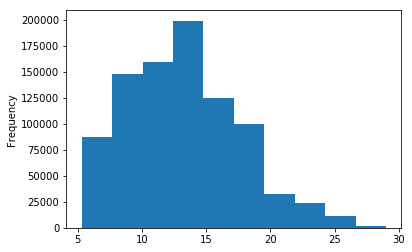

In [11]:
plt.show()
#The interest rate varies from 5 to 30

In [13]:
#The term is a very imp column where it confirms that there are no null columns in it
df_new_cols['term'].value_counts()

 36 months    621125
 60 months    266254
Name: term, dtype: int64

In [15]:
df_new_cols['term'].value_counts().plot.bar()

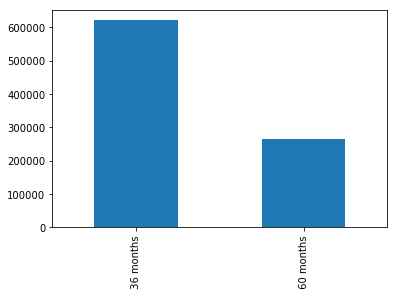

In [16]:
plt.show()

In [17]:
#We could see that the majority of the loans are taken at 36 month period which is 3 years
#Anaysing the interst rate as strip plot 
import seaborn as sns


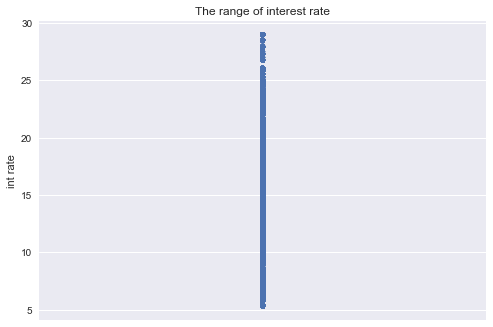

In [19]:
sns.stripplot(y='int_rate',data=df_new_cols)
plt.ylabel('int rate')
plt.title('The range of interest rate')
plt.show()

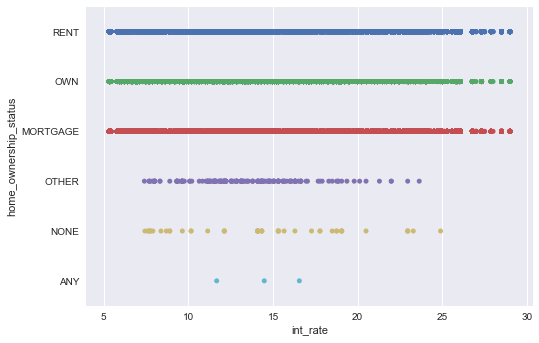

In [39]:
sns.stripplot(x='int_rate',y='home_ownership',data=df_new_cols)
plt.ylabel('home_ownership_status')
plt.xlabel('int_rate')
plt.show()

#We could see that the int rates are dependent on grades of the lender.

In [27]:
df_new_cols['grade'].value_counts()

B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64

In [28]:
df['purpose'].value_counts().plot.barh()
plt.xlabel('Purpose of loan',labelpad=14)
plt.ylabel('Count of People opted',labelpad=14)
plt.title('Count of the Purpose of the loan taken')

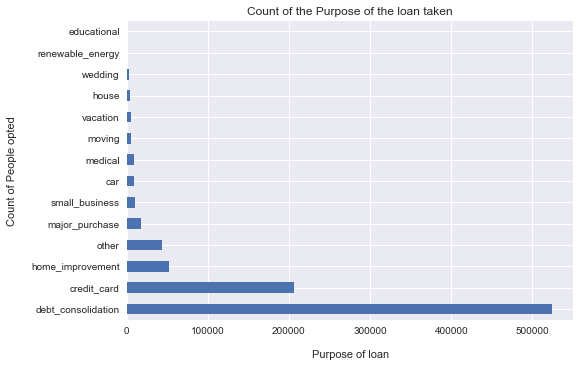

In [29]:
plt.show()
#Most people's purpose of getting loan is[Debt consolidation,credit card and home improvement]

In [31]:
df_new_cols['home_ownership'].value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

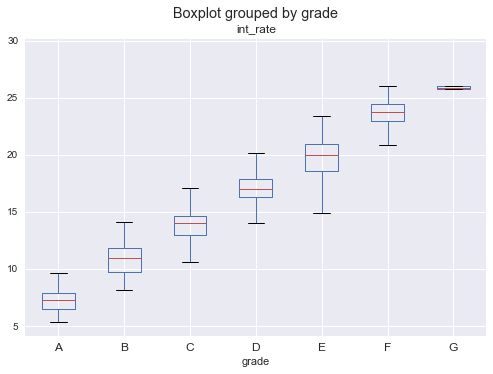

In [34]:
df_new_cols.boxplot(column='int_rate', by='grade')
plt.show()
#We could clearly conclude that the int rates are completely dependent on the grades of the lenders.